## TITANIC
Campos:
* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - -Number of Siblings/Spouses Aboard (Número de hermanos / cónyuges a bordo)
* parch - Number of Parents/Children Aboard  (Número de padres / niños a bordo)
* ticket - Ticket Number
* fare - Passenger Fare (Tarifa de pasajero)
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) (Puerto de embarque)
* boat - Lifeboat (if survived) (Bote salvavidas)
* body - Body number (if did not survive and body was recovered)

## IMPORTACION DE LIBRERIAS Y CARGUE DEL ARCHIVO

In [6]:
 ## Librerias necesarias
import pandas as pd # especializada en el manejo y análisis de estructuras de datos
import numpy as np # especializada en el cálculo numérico y el análisis de datos, para un gran volumen de datos.
import matplotlib.pyplot as plt # biblioteca para la generación de gráficos a partir de datos de listas o arrays
import matplotlib.ticker as mtick 
import warnings # maneja las advertencias en Python.
warnings.filterwarnings("ignore")
titanic = pd.read_csv('F:/JEP/Python - Análisis y visualización de datos/EDA_Course/bases_de_datos/Titanic/test.csv')

In [304]:
titanic.head() #--> muestra los primeros registros
# titanic.tail() #--> muestra los ultimos 10 registros
# titanic.columns.values.tolist() # Lista las columnas del DataFrame
# titanic.index 
# titanic.count # resume las cantidades segun cada columnas del dataframe.
#--------------------------------------------------------
# print(titanic.shape) # Validando la cantidad de datos (Filas, columnas)
print(titanic.info()) # Validando la estructura de los datos
# print(titanic.describe()) # Validando el comportamienton general de los datos numericos
# print(titanic['Name'].dtype) # Validando la estructura de los datos segun campo especifico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


## LIMPIEZA DE DATOS

In [16]:
print(titanic.describe()) # Validando el comportamienton general de los datos numericos

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [217]:
print (titanic.isnull().sum().sort_values(ascending=False).name)
#vacios
# columns_names = df.columns.values

None


In [288]:
vacios = titanic.isnull().sum().sort_values(ascending=False)             # cantidad de datos faltantes por columna
vacios_porc = (titanic.isnull().mean()*100).sort_values(ascending=False) # cantidad de datos faltantes en %
df = pd.DataFrame(dict( cantidad = vacios[vacios > 0], Porcentaje = vacios_porc[vacios_porc > 0]))
df

,cantidad,Porcentaje
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


<AxesSubplot:>

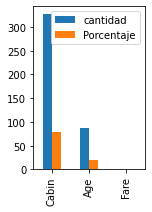

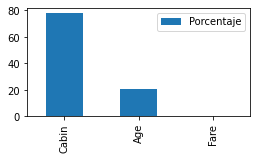

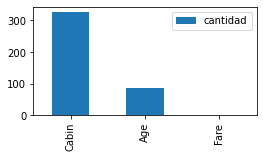

In [248]:
df.plot(kind='bar',figsize=(2,3))
df.plot(kind='bar',y='Porcentaje',figsize=(4,2))
df.plot(kind='bar',y='cantidad',figsize=(4,2))


In [294]:
# eliminar registros con vacios segun columna
titanic_sin_vacios = titanic.dropna(axis=0, subset=['Fare'])
# titanic_sin_vacios = titanic.dropna() # eliminar registros con vacios segun todas las columnas que tenga vacio
titanic_sin_vacios.shape

(417, 11)

## GRAFICAR

<AxesSubplot:xlabel='Age', ylabel='Fare'>

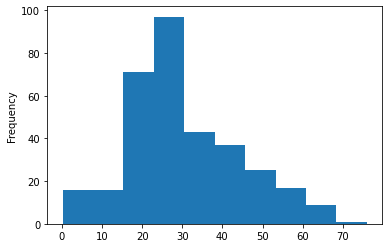

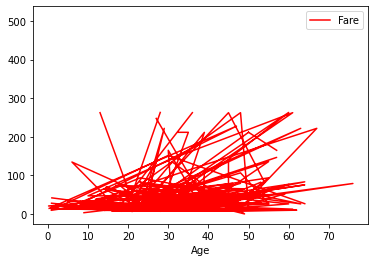

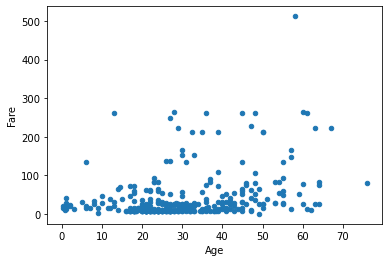

In [327]:
# titanic['Sex'].value_counts().plot(kind='bar') # diagrama de barras
titanic['Age'].plot(kind='hist') # Histograma
titanic[titanic['Embarked']=='S']['Age'].hist() # Histograma descriminado
titanic.plot('Age', 'Fare',kind='line', color='red') # Lineas
titanic.plot('Age', 'Fare',kind='scatter') # dispersión

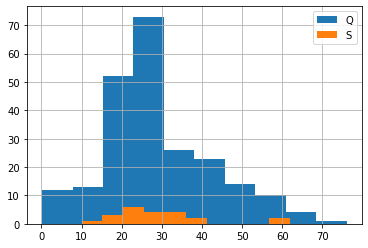

In [332]:
titanic[titanic['Embarked']=='S']['Age'].hist()
titanic[titanic['Embarked']=='Q']['Age'].hist()
plt.legend(['Q','S'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

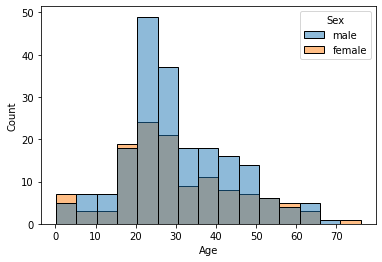

In [337]:
import seaborn as sns
sns.histplot(data= titanic, x='Age',hue='Sex')
#------


<AxesSubplot:xlabel='Sex', ylabel='Age'>

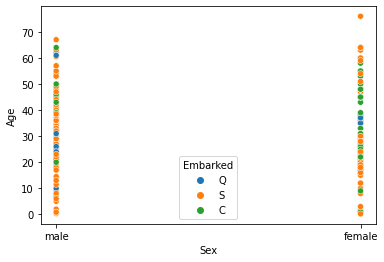

In [341]:

sns.scatterplot(x='Sex', y='Age', hue='Embarked', data=titanic)

<AxesSubplot:>

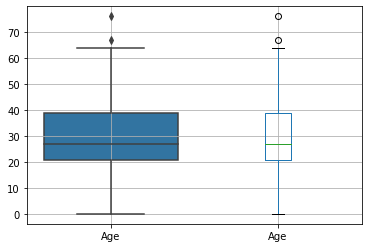

In [353]:
import seaborn as sns
sns.boxplot(data = titanic.Age)
titanic.boxplot(column=['Age'])

array([<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>,
       <AxesSubplot:title={'center':'Age'}, xlabel='Pclass'>],
      dtype=object)

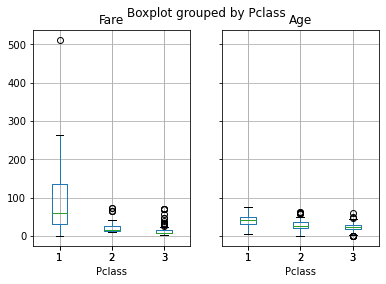

In [383]:
titanic.boxplot(column=['Fare', 'Age'], by='Pclass')
